In [4]:
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import pandas as pd
from nltk.stem import PorterStemmer
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from sklearn.model_selection import train_test_split
import gensim
from gensim.models.word2vec import Word2Vec 
LabeledSentence = gensim.models.doc2vec.LabeledSentence
from sklearn.preprocessing import scale
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ebinjosemathew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df=pd.read_csv("IMDB Dataset.csv")#IMDB Dataset.csv
df = df[df['sentiment'].isnull() == False]

BASIC EXPLORATORY DATA ANALYSIS

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.shape

(50000, 2)

In [8]:
#checking data is balanced or not
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

ANALYSIS OF TEXT STASTICS

<AxesSubplot:>

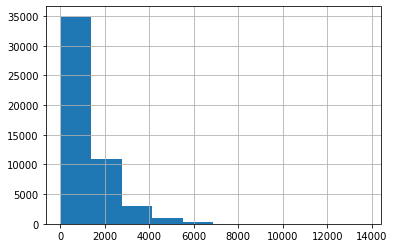

In [6]:
#length of reviews
df["review"].str.len().hist()
#most reviews are 0 to 2000 characters long but some range from 0 to 7000 characters 

1.4511308670043945


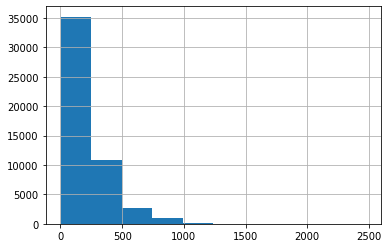

In [10]:
start_time = time()
df["review"].str.split().map(lambda x: len(x)).hist();
print(time() - start_time)

#most headlines have 0 to 200 words 

<AxesSubplot:>

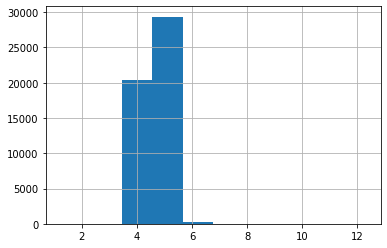

In [11]:
df['review'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
#this shows average word length 

<BarContainer object of 10 artists>

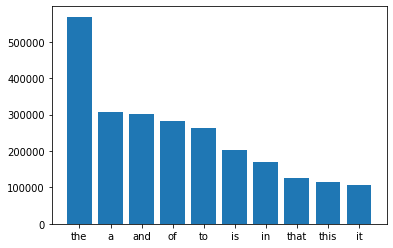

In [7]:
#plotting top stop words
stop_words = set(stopwords.words('english'))          
corpus=[]
df_cor= df['review'].str.split()
df_cor=df_cor.values.tolist()
corpus=[word for i in df_cor for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1
        
     
SW=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*SW)
plt.bar(x,y)

In [13]:
#plotting words except stop words 
from collections import  Counter    
counter=Counter(corpus)
most=counter.most_common()
most

[('the', 568735),
 ('a', 306960),
 ('and', 301919),
 ('of', 283625),
 ('to', 261850),
 ('is', 203056),
 ('in', 169981),
 ('I', 132498),
 ('that', 126818),
 ('this', 113726),
 ('it', 107916),
 ('/><br', 100974),
 ('was', 92658),
 ('as', 83130),
 ('with', 82569),
 ('for', 80919),
 ('The', 67317),
 ('but', 66282),
 ('on', 61197),
 ('movie', 60762),
 ('are', 56513),
 ('film', 54277),
 ('his', 54198),
 ('have', 54009),
 ('not', 52140),
 ('you', 50697),
 ('be', 50539),
 ('at', 42421),
 ('by', 42290),
 ('he', 42114),
 ('one', 41334),
 ('an', 41076),
 ('from', 37876),
 ('who', 37207),
 ('like', 36028),
 ('all', 35272),
 ('they', 35201),
 ('has', 32420),
 ('so', 32386),
 ('just', 32338),
 ('or', 32221),
 ('about', 32036),
 ('her', 29944),
 ('out', 28679),
 ('some', 28052),
 ('very', 25794),
 ('more', 25412),
 ('This', 24329),
 ('would', 23578),
 ('what', 23320),
 ('when', 22749),
 ('good', 22582),
 ('if', 22009),
 ('their', 21975),
 ('only', 21694),
 ('It', 21475),
 ('really', 21322),
 ('had', 

<AxesSubplot:>

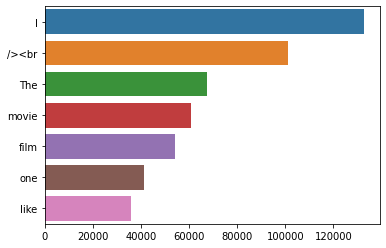

In [14]:
x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x) 

In [9]:
ps =PorterStemmer()
stop_words = set(stopwords.words('english'))          
def process_text(text):
    text = text.lower()                                        #converting data into lower case
    text = re.sub(r'[^\x61-\x7F]+',' ', text)                  #removing numbers and other unwanted characters 
    text = re.sub('@[^\s]+', ' y', text)
    text = word_tokenize(text)                                 #tokenizing text
    text = [ps.stem(w) for w in text if w not in stop_words]   #removing stop words  
    return text

In [10]:
df['review'] = df['review'].apply(process_text)       

In [18]:
df.sample(5)

,review,sentiment
37765,"[earli, career, abe, lincoln, beauti, present,...",positive
16772,"[final, seen, real, reason, peter, boyl, becam...",positive
33866,"[minut, start, watch, realis, watch, qualiti, ...",positive
16037,"[turn, point, night, must, fall, robert, montg...",negative
49692,"[woa, talk, aw, wast, time, wish, seen, use, c...",negative


In [12]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(np.array(df.head(25000).review),np.array(df.head(25000).sentiment), test_size=0.33,random_state=1)

In [16]:
x_train[1222]

['film',
 'nightmar',
 'sensat',
 'feel',
 'wake',
 'nightmar',
 'got',
 'finish',
 'watch',
 'movi',
 'uff',
 'ok',
 'end',
 'relief',
 'felt',
 'pain',
 'watch',
 'movi',
 'bad',
 'b',
 'seri',
 'low',
 'cost',
 'movi',
 'sure',
 'think',
 'excus',
 'bad',
 'watch',
 'brilliant',
 'low',
 'cost',
 'movi',
 'nice',
 'plot',
 'nice',
 'product',
 'nice',
 'act',
 'substanc',
 'one',
 'got',
 'noth',
 'plot',
 'hilari',
 'almost',
 'seem',
 'like',
 'american',
 'guid',
 'transform',
 'ancient',
 'chines',
 'mytholog',
 'ridicul',
 'teenag',
 'movi',
 'kid',
 'play',
 'occult',
 'know',
 'chines',
 'tale',
 'present',
 'movi',
 'real',
 'damag',
 'even',
 'wors',
 'product',
 'horribl',
 'plain',
 'zero',
 'special',
 'effect',
 'suspens',
 'suppos',
 'tension',
 'scene',
 'complet',
 'failur',
 'act',
 'better',
 'dialog',
 'oh',
 'god',
 'movi',
 'sever',
 'time',
 'dialog',
 'like',
 'pass',
 'later',
 'ok',
 'alright',
 'ok',
 'alright',
 'ok',
 'ok',
 'alright',
 'bye',
 'sure',
 '

LABELIZING

In [13]:
def labelizesentiment(review, sentiment):
    labelized = []
    for i,v in tqdm(enumerate(review)):
        sentiment = '%s_%s'%(sentiment,i)
        labelized.append(LabeledSentence(v, [sentiment]))
    return labelized

x_train = labelizesentiment(x_train, 'TRAIN')
x_test = labelizesentiment(x_test, 'TEST')

0it [00:00, ?it/s]<ipython-input-13-c916994c2ee8>:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  labelized.append(LabeledSentence(v, [sentiment]))
16750it [00:00, 42123.61it/s]
8250it [00:00, 68861.84it/s]


In [14]:
n=1000000
n_dim = 200
sentiment_w2v = Word2Vec(size=n_dim, min_count=10)
sentiment_w2v.build_vocab([x.words for x in tqdm(x_train)])

100%|██████████| 16750/16750 [00:00<00:00, 994614.45it/s]


In [16]:
#saving the model using pickle
filename_vec = 'sentiment_w2v_model.sav'
pickle.dump(sentiment_w2v, open(filename_vec, 'wb'))

In [17]:
sentiment_w2v.train([x.words for x in tqdm(x_train)],total_examples=sentiment_w2v.corpus_count, epochs=sentiment_w2v.iter)

100%|██████████| 16750/16750 [00:00<00:00, 1088931.48it/s]
<ipython-input-17-ad926bb66a0b>:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  sentiment_w2v.train([x.words for x in tqdm(x_train)],total_examples=sentiment_w2v.corpus_count, epochs=sentiment_w2v.iter)


(9002659, 10226380)

In [21]:
sentiment_w2v["box"]

<ipython-input-21-de4950dabded>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentiment_w2v["box"]


array([-3.56967002e-01,  4.31585401e-01, -3.26515660e-02,  4.47448909e-01,
       -1.54812708e-01,  4.11911964e-01,  1.12534098e-01,  4.35627311e-01,
       -2.37324730e-01,  1.01574802e+00,  5.76768816e-03,  1.75272804e-02,
        1.08012661e-01, -3.59658629e-01, -5.94010465e-02,  9.20860171e-01,
        7.48337805e-01, -4.21430409e-01,  4.76939708e-01, -7.28950053e-02,
        1.01471521e-01, -4.76076573e-01, -3.59207064e-01, -5.42535633e-02,
        3.14768791e-01,  2.33835876e-01,  5.39345853e-02, -8.57225657e-01,
       -1.58916354e-01,  3.77943695e-01,  1.45754203e-01, -2.61916429e-01,
       -1.52061597e-01, -4.89918113e-01,  4.00549591e-01,  8.66524577e-02,
       -2.01447994e-01, -5.00041723e-01,  7.64450133e-01,  2.15574518e-01,
       -3.04184020e-01, -2.94049352e-01,  2.46143878e-01,  6.83120251e-01,
       -3.45033050e-01, -4.90229189e-01, -1.08886766e+00,  2.23247528e-01,
        4.93539482e-01,  3.55113074e-02, -1.17611408e+00,  7.86654174e-01,
       -4.14649874e-01, -

In [22]:
sentiment_w2v["trash"]

<ipython-input-22-60a29655b48f>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentiment_w2v["trash"]


array([-2.22729757e-01,  1.55833602e-01, -5.64778447e-01,  3.04081589e-02,
       -3.33833206e-03,  4.80443507e-01, -2.21901774e-01,  5.12891233e-01,
       -4.18943018e-01,  4.99759108e-01, -4.55611080e-01,  5.47883689e-01,
       -6.08198822e-01,  1.37461275e-01, -1.98791936e-01,  2.39593148e-01,
        1.86403245e-01, -2.07061514e-01,  6.61632895e-01,  2.16565236e-01,
       -1.97409049e-01, -1.88268498e-01, -1.55191198e-01,  3.56790304e-01,
        4.53786939e-01,  1.78710803e-01, -1.71837270e-01, -5.36166668e-01,
       -6.77317202e-01, -3.89139593e-01,  8.86073411e-02,  2.94563323e-01,
       -6.25473186e-02, -4.51802552e-01, -6.69308100e-03, -7.97715902e-01,
        6.53192848e-02, -3.12025070e-01,  2.20569551e-01,  9.24434811e-02,
        5.63867241e-02,  1.36406824e-01, -9.43380371e-02, -9.00797248e-02,
       -2.39574537e-01, -2.34960303e-01, -5.48789389e-02,  5.50867438e-01,
        7.40919471e-01, -2.91447848e-01, -5.34189880e-01,  1.24388680e-01,
        3.71796777e-04, -

In [18]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += sentiment_w2v[word].reshape((1, size)) 
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [19]:
train_vecs_w2v = np.concatenate([buildWordVector(z, n_dim) for z in tqdm(map(lambda x: x.words, x_train))])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, n_dim) for z in tqdm(map(lambda x: x.words, x_test))])
test_vecs_w2v = scale(test_vecs_w2v)


0it [00:00, ?it/s]<ipython-input-18-3ea714a3f541>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec += sentiment_w2v[word].reshape((1, size))
16750it [00:10, 1523.58it/s]
0it [00:00, ?it/s]<ipython-input-18-3ea714a3f541>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec += sentiment_w2v[word].reshape((1, size))
8250it [00:06, 1311.92it/s]


TRAINING MODELS

Naive_bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [23]:
gnb = GaussianNB()
gnb_preds = gnb.fit(train_vecs_w2v, y_train).predict(test_vecs_w2v)
print(accuracy_score(gnb_preds, y_test)*100)

76.04848484848485


In [24]:
f1_score(y_test, gnb_preds, average='micro')

0.7604848484848485

In [25]:
recall_score(y_test, gnb_preds, average='micro')

0.7604848484848484

SVM

In [26]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(train_vecs_w2v, y_train)
svm_preds = clf.predict(test_vecs_w2v)
print(accuracy_score(svm_preds, y_test)*100)

84.7030303030303


/home/ebinjosemathew/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [27]:
f1_score(y_test, svm_preds, average='micro')

0.847030303030303

In [28]:
recall_score(y_test, svm_preds, average='micro')

0.847030303030303

DecisionTreeClassifier

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf,train_vecs_w2v, y_train, cv=10)

array([0.69791045, 0.72835821, 0.71044776, 0.71940299, 0.73134328,
       0.71104478, 0.72955224, 0.70925373, 0.71820896, 0.71641791])

In [30]:
dis = DecisionTreeClassifier(random_state=0,max_depth=6).fit(train_vecs_w2v, y_train)
dis_preds = dis.predict(test_vecs_w2v)
print(accuracy_score(dis_preds, y_test)*100)

75.46666666666667


In [31]:
f1_score(y_test, dis_preds, average='micro')

0.7546666666666666

In [32]:
recall_score(y_test, dis_preds, average='micro')

0.7546666666666667

LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0).fit(train_vecs_w2v, y_train)

log_preds = clf_LR.predict(test_vecs_w2v)
print(accuracy_score(log_preds, y_test)*100)

84.7151515151515


/home/ebinjosemathew/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
f1_score(y_test, log_preds, average='micro')

0.8471515151515151

In [36]:
recall_score(y_test, log_preds, average='micro')

0.8471515151515151